In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.data_loader.DataLoader import DataLoader
from src.eval import (
    eval_adam,
    eval_iwls,
    eval_lda,
    eval_qda,
    eval_random_forest,
    eval_sgd,
    eval_tree,
)

sns.set_theme(rc={"figure.figsize": (12, 10)}, style="whitegrid")

In [2]:
random_states = [420, 69, 42, 24, 96, 1312, 777]

In [3]:
loader = DataLoader(product=True)

results = []

for dataset in loader.get_small_supported_datasets():
    for random_state in random_states:
        results.append(eval_iwls(loader, dataset, random_state, max_iterations=500, patience=5)[0])
        results.append(eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5, learning_rate=0.001)[0])
        results.append(eval_adam(loader, dataset, random_state, max_iterations=500, patience=5, learning_rate=0.01)[0])
        results.append(eval_lda(loader, dataset, random_state))
        results.append(eval_qda(loader, dataset, random_state))
        results.append(eval_tree(loader, dataset, random_state))
        results.append(eval_random_forest(loader, dataset, random_state))

df_product = pd.DataFrame.from_records(results)
df_product["product"] = True

In [4]:
loader = DataLoader(product=False)

results = []

for dataset in loader.get_supported_datasets():
    for random_state in random_states:
        results.append(eval_iwls(loader, dataset, random_state, max_iterations=500, patience=5)[0])
        results.append(eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5, learning_rate=0.001)[0])
        results.append(eval_adam(loader, dataset, random_state, max_iterations=500, patience=5, learning_rate=0.01)[0])
        results.append(eval_lda(loader, dataset, random_state))
        results.append(eval_qda(loader, dataset, random_state))
        results.append(eval_tree(loader, dataset, random_state))
        results.append(eval_random_forest(loader, dataset, random_state))

df_no_product = pd.DataFrame.from_records(results)
df_no_product["product"] = False

In [5]:
df_all = pd.concat((df_product, df_no_product), axis=0)
df_all.to_csv("classification_performance.csv", index=False)

In [55]:
df = pd.read_csv("classification_performance.csv")
df.head()

,dataset,method,time,accuracy,random_state,iters,product
0,banknote,IWLS,0.003713,0.867278,420,11,True
1,banknote,SGD,5.771048,0.862911,420,501,True
2,banknote,ADAM,0.414576,0.857995,420,24,True
3,banknote,LDA,0.000663,0.863996,420,-1,True
4,banknote,QDA,0.000284,0.869974,420,-1,True


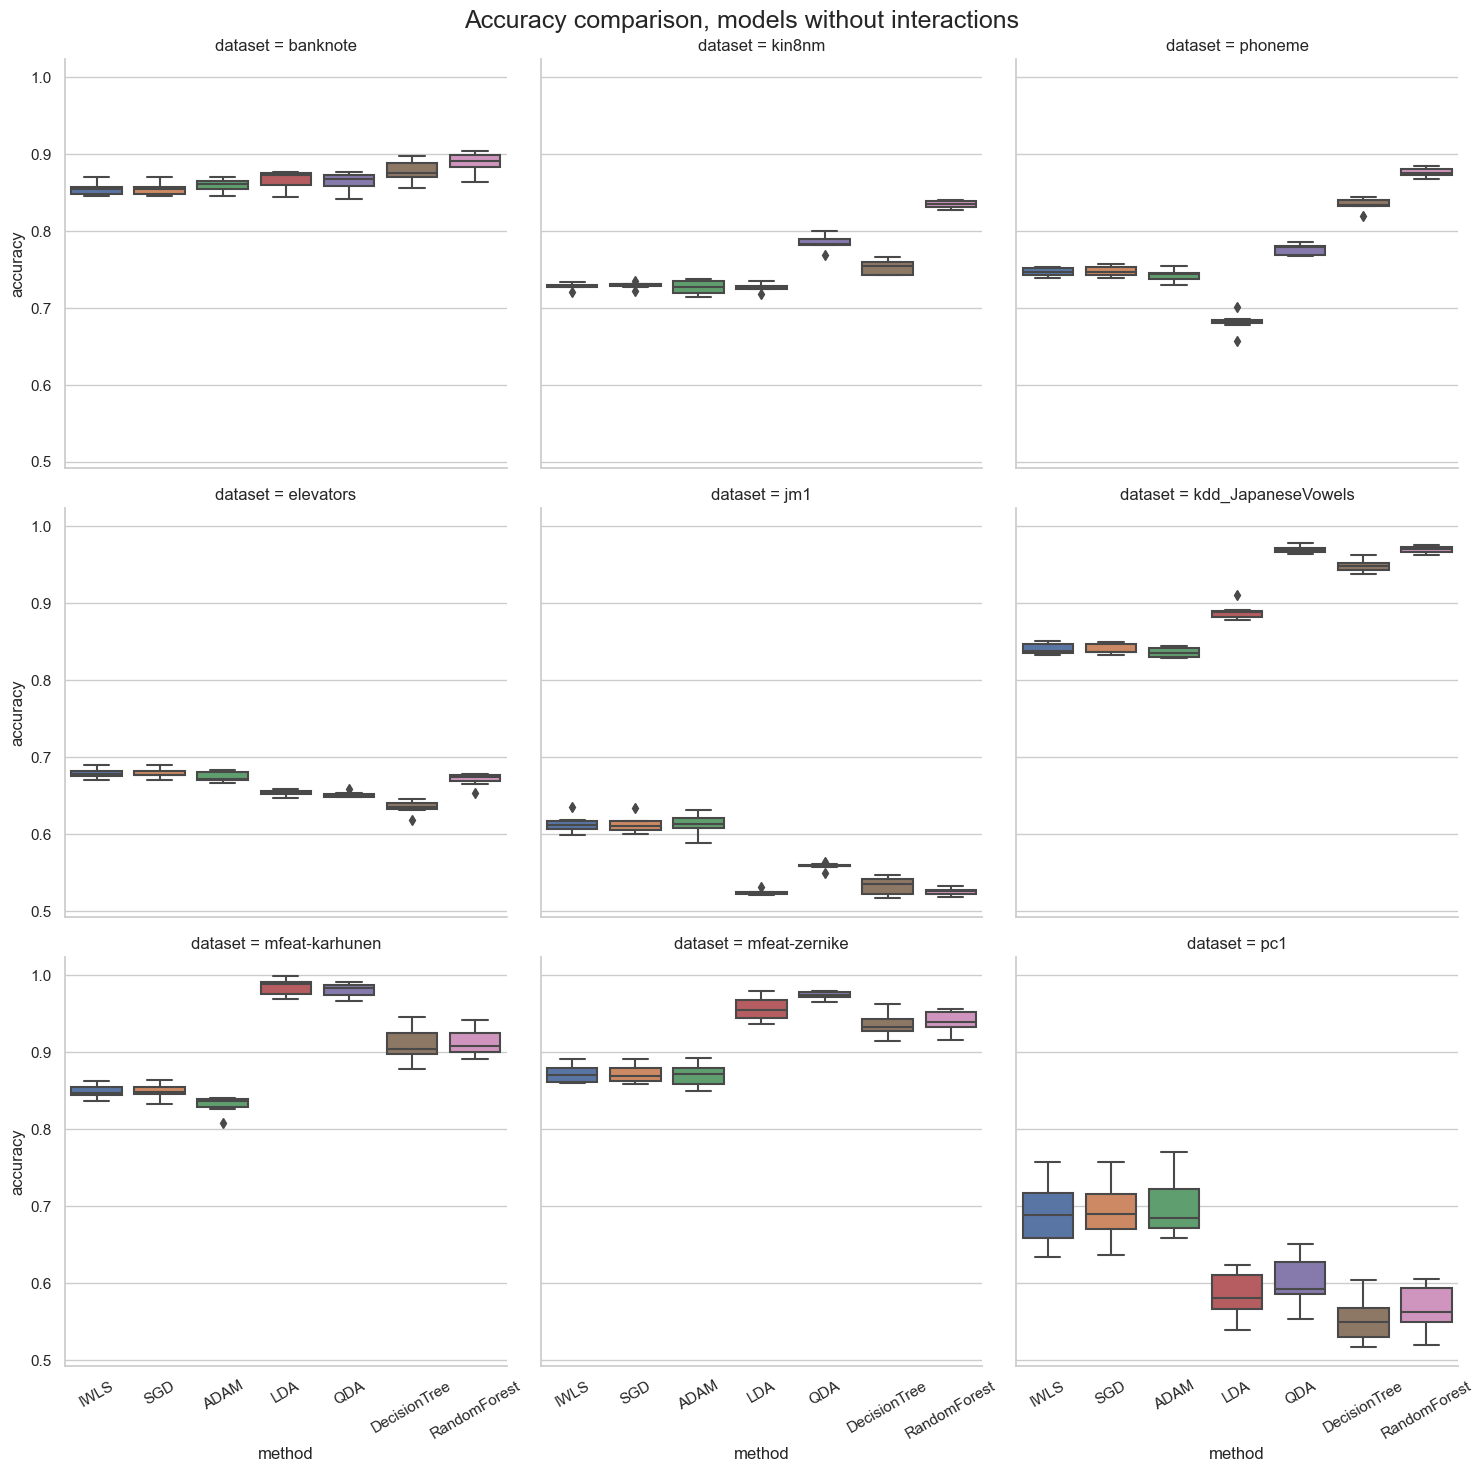

In [47]:
g = sns.catplot(
    data=df[df["product"] == False],
    x="method",
    y="accuracy",
    col="dataset",
    kind="box",
    col_wrap=3,
)
g.tick_params(axis="x", rotation=30)
plt.suptitle("Accuracy comparison, models without interactions", fontsize=18)
plt.tight_layout()
plt.show()

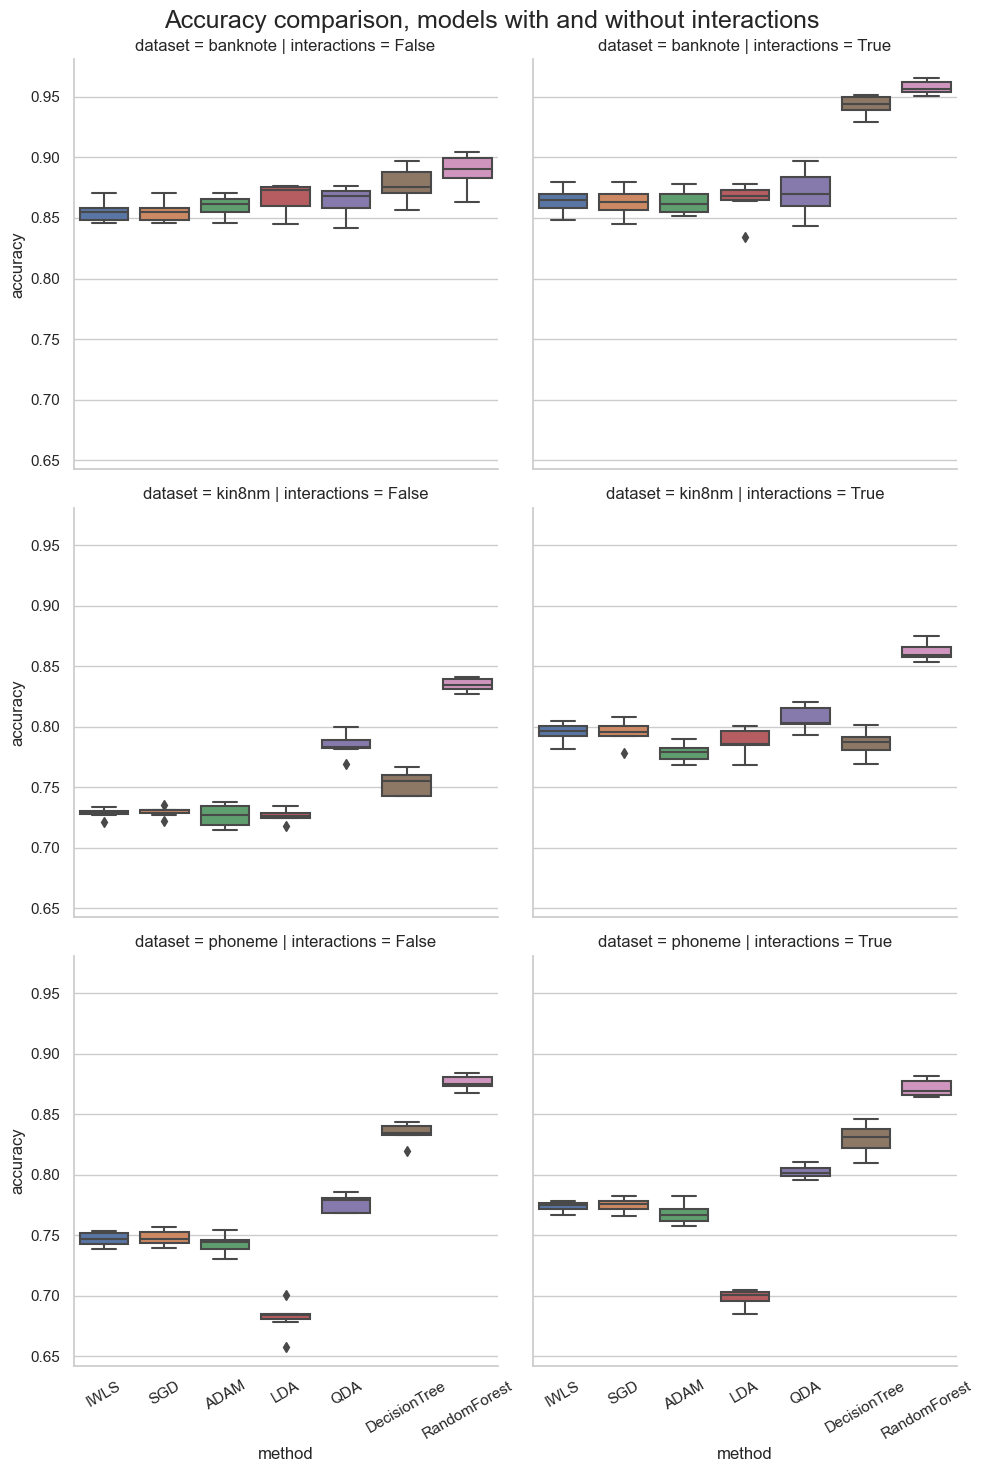

In [48]:
df2 = df.rename(columns={"product": "interactions"})

g = sns.catplot(
    data=df2[df2["dataset"].isin(loader.get_small_supported_datasets())],
    x="method",
    y="accuracy",
    row="dataset",
    col="interactions",
    kind="box",
)
g.tick_params(axis='x', rotation=30)
plt.suptitle("Accuracy comparison, models with and without interactions", fontsize=18)
plt.tight_layout()
plt.show()

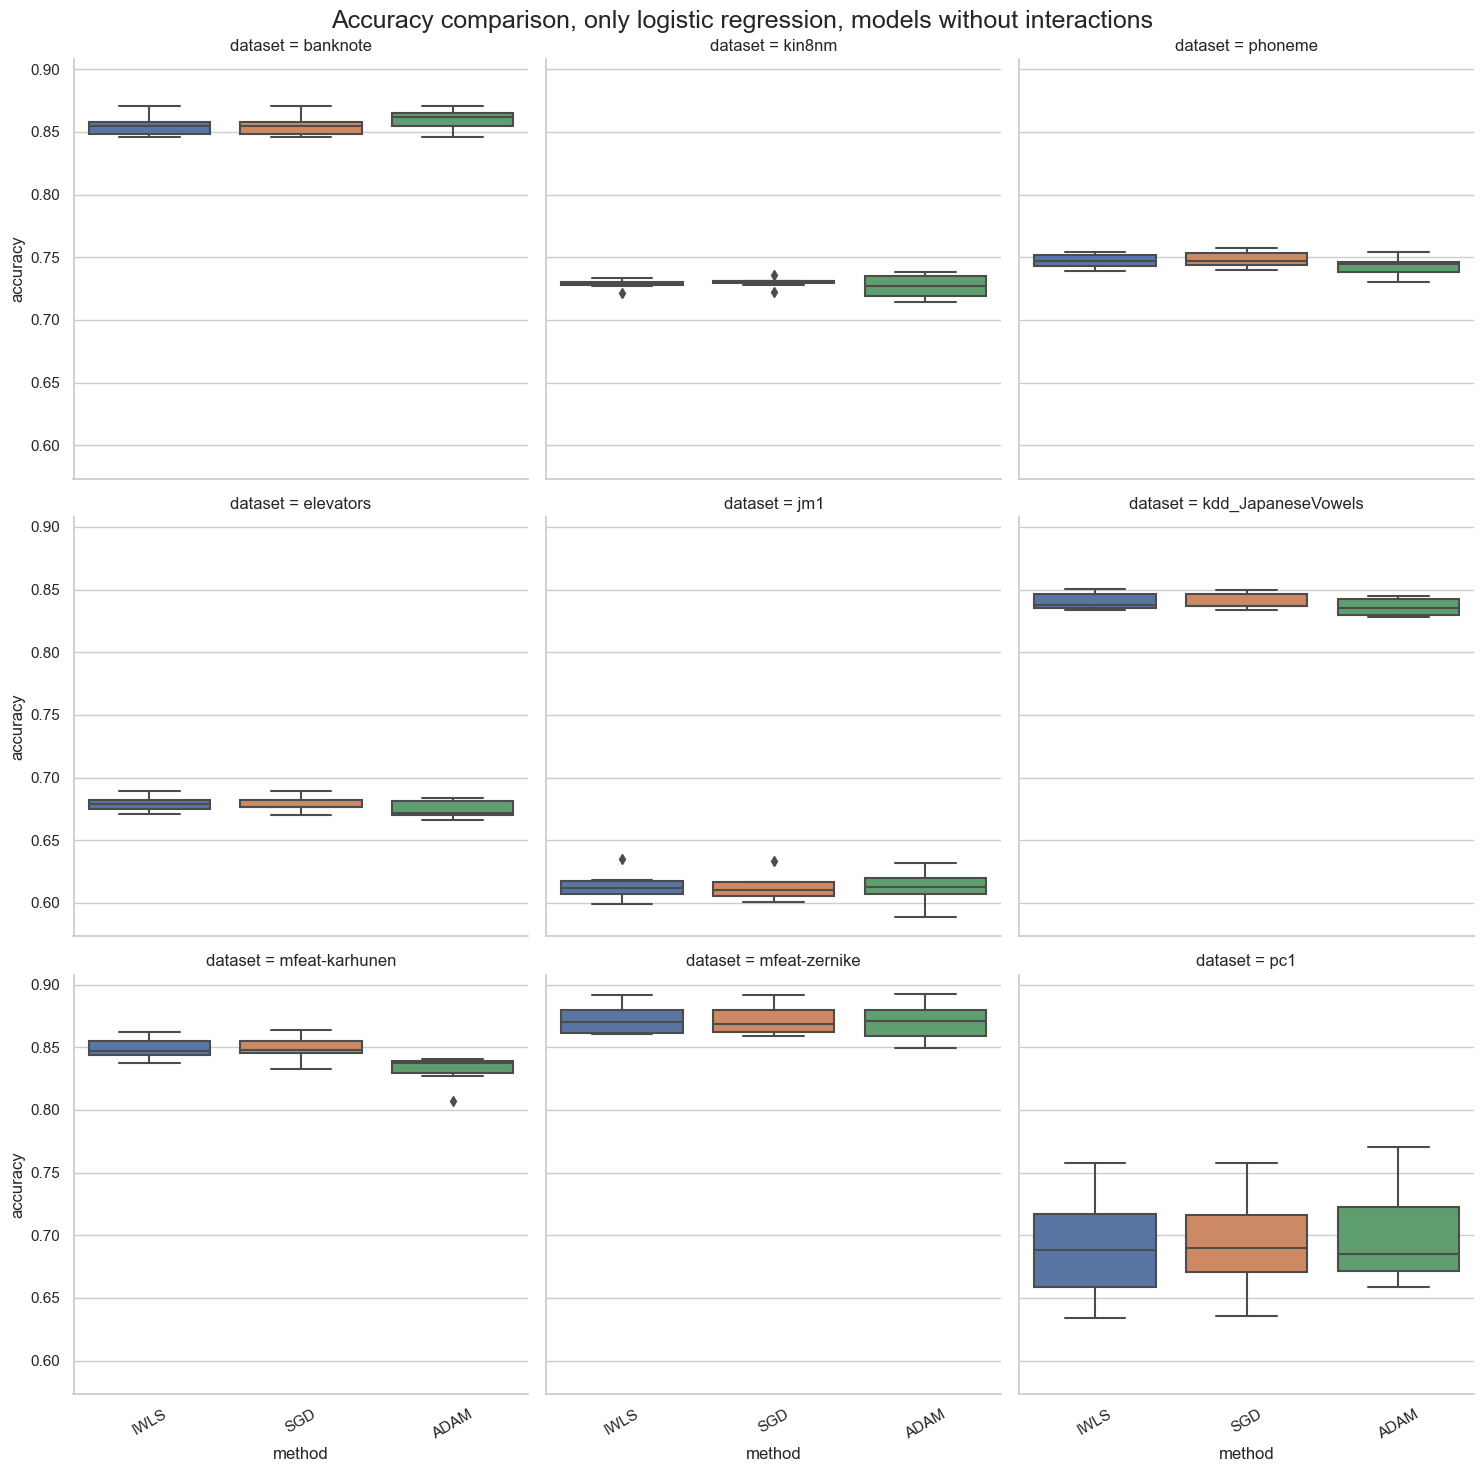

In [58]:
g = sns.catplot(
    data=df[(df["product"] == False) & (df["method"].isin(["IWLS", "SGD", "ADAM"]))],
    x="method",
    y="accuracy",
    col="dataset",
    kind="box",
    col_wrap=3,
)
g.tick_params(axis="x", rotation=30)
plt.suptitle("Accuracy comparison, only logistic regression, models without interactions", fontsize=18)
plt.tight_layout()
plt.show()

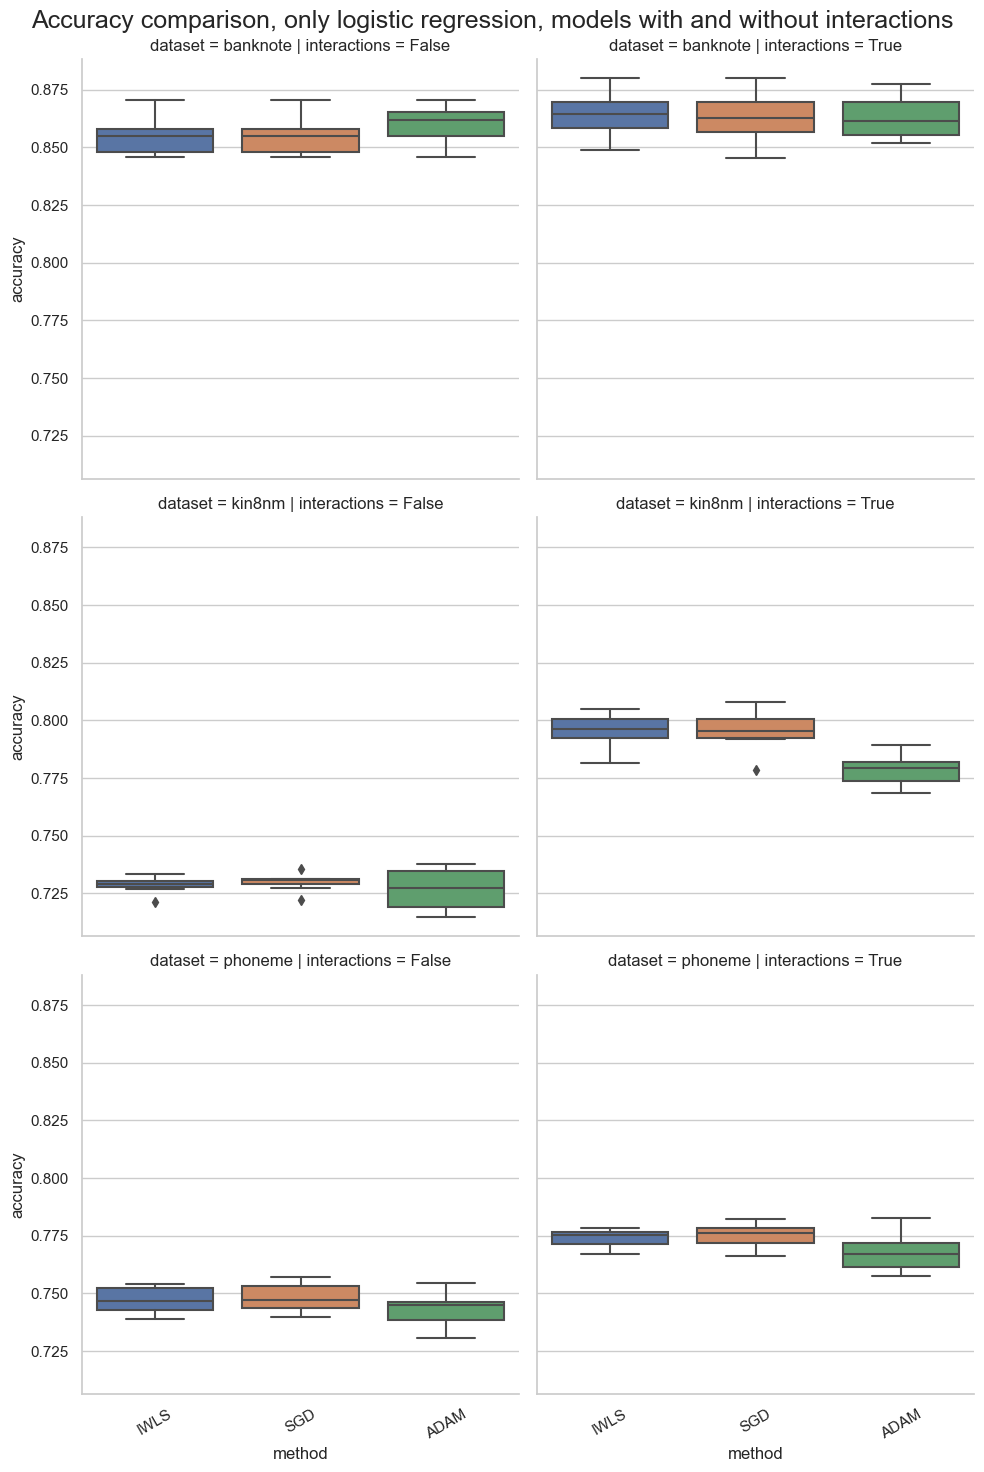

In [59]:
df2 = df.rename(columns={"product": "interactions"})

g = sns.catplot(
    data=df2[(df2["dataset"].isin(loader.get_small_supported_datasets())) & (df["method"].isin(["IWLS", "SGD", "ADAM"]))],
    x="method",
    y="accuracy",
    row="dataset",
    col="interactions",
    kind="box",
)
g.tick_params(axis='x', rotation=30)
plt.suptitle("Accuracy comparison, only logistic regression, models with and without interactions", fontsize=18)
plt.tight_layout()
plt.show()